# Import Library yang Diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv('/content/gym_datasets.csv')

# Tampilkan 10 baris pertama
df.head(10)

,profesi,frekuensi latihan,durasi latihan,tingkat kesibukan,program latihan
0,sekolah,5,60,sedang,"push, pull, leg"
1,karyawan,5,60,sedang,"push, pull, leg"
2,karyawan,3,90,sedang,full body workout
3,mahasiswa,4,75,sedang,upper & lower
4,mahasiswa,2,120,tinggi,full body workout
5,karyawan,5,60,sedang,"push, pull, leg"
6,karyawan,3,90,tinggi,upper & lower
7,karyawan,6,45,rendah,"push, pull, leg"
8,mahasiswa,3,90,tinggi,upper & lower
9,karyawan,6,45,rendah,"push, pull, leg"


In [ ]:
# Cek ukuran awal
print("Ukuran awal:", df.shape)

Ukuran awal: (211, 5)


#Data Preprocessing

## Missing Value

In [ ]:
# Cek missing value
print("\nMissing values per kolom:\n", df.isnull().sum())


Missing values per kolom:
 profesi              0
frekuensi latihan    0
durasi latihan       0
tingkat kesibukan    0
program latihan      0
dtype: int64


## Normalisasi Fitur Numerik

In [ ]:
# Normalisasi kolom numerik
scaler = MinMaxScaler()
numeric_cols = ['frekuensi latihan', 'durasi latihan']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df[numeric_cols].head()

,frekuensi latihan,durasi latihan
0,0.75,0.2
1,0.75,0.2
2,0.25,0.6
3,0.50,0.4
4,0.00,1.0


## Cek Outlier

## Analisis Korelasi

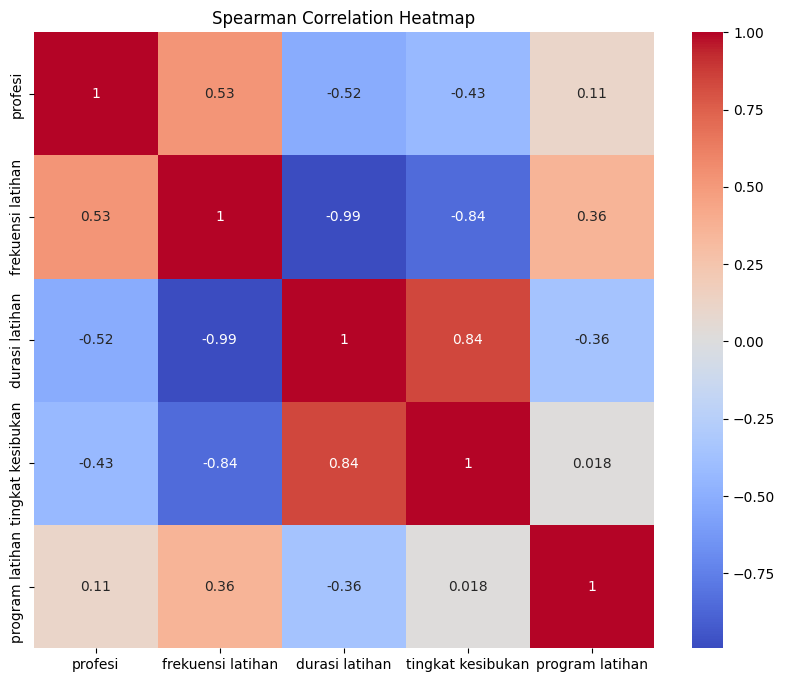

In [ ]:
# Ubah kategorikal jadi angka sementara untuk korelasi
df_temp = df.copy()
le = LabelEncoder()
df_temp['profesi'] = le.fit_transform(df_temp['profesi'])
df_temp['tingkat kesibukan'] = le.fit_transform(df_temp['tingkat kesibukan'])
df_temp['program latihan'] = le.fit_transform(df_temp['program latihan'])

# Korelasi Spearman
correlation = df_temp.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

## Encoding Fitur Kategorikal

In [ ]:
le_profesi = LabelEncoder()
le_program = LabelEncoder()
map_kesibukan = {"rendah": 1, "sedang": 2, "tinggi": 3}

df['profesi'] = le_profesi.fit_transform(df['profesi'])
df['tingkat kesibukan'] = df['tingkat kesibukan'].map(map_kesibukan)
df['program latihan'] = le_program.fit_transform(df['program latihan'])

df.head()

,profesi,frekuensi latihan,durasi latihan,tingkat kesibukan,program latihan
0,4,0.75,0.2,2,1
1,2,0.75,0.2,2,1
2,2,0.25,0.6,2,0
3,3,0.50,0.4,2,2
4,3,0.00,1.0,3,0


In [ ]:
joblib.dump(le_profesi, 'le_profesi.pkl')
joblib.dump(le_program, 'le_program.pkl')

['le_program.pkl']

## Splitting Data

In [ ]:
# Fitur dan target
X = df[['profesi', 'tingkat kesibukan', 'durasi latihan', 'frekuensi latihan']]
y = df['program latihan']

# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing :", X_test.shape)

Ukuran data training: (168, 4)
Ukuran data testing : (43, 4)


# Modelling

##Build Model

In [ ]:
# Cek jumlah kelas
num_classes = len(np.unique(y_train))
num_classes

3

In [ ]:
# 1. Inisialisasi Model
# Siapkan tiga model yang akan digunakan dalam sebuah dictionary agar mudah dikelola.
models = {
    'K-Nearest Neighbor': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
# 2. Melatih Setiap Model
# Melatih setiap model menggunakan perulangan (loop).
for model_name, model in models.items():
    print(f"Melatih model {model_name}...")
    model.fit(X_train, y_train) # Menggunakan X_train yang belum di-scale untuk DT dan RF
print("\nSeluruh model berhasil dilatih!")

Melatih model K-Nearest Neighbor...
Melatih model Decision Tree...
Melatih model Random Forest...

Seluruh model berhasil dilatih!


In [ ]:
# 3. Membuat dan Menyimpan Prediksi dari Setiap Model
# Setelah dilatih, buat prediksi dari setiap model pada data uji (X_test).
predictions = {}
for model_name, model in models.items():
    print(f"Membuat prediksi dengan model {model_name}...")
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

print("\nPrediksi dari seluruh model berhasil dibuat.")
# Variabel 'predictions' berisi hasil prediksi dari ketiga model,
# siap untuk dievaluasi di tahap selanjutnya.
# Contoh: predictions['K-Nearest Neighbor'] akan berisi array prediksi dari KNN.

Membuat prediksi dengan model K-Nearest Neighbor...
Membuat prediksi dengan model Decision Tree...
Membuat prediksi dengan model Random Forest...

Prediksi dari seluruh model berhasil dibuat.


## Evaluasi Model

HASIL EVALUASI UNTUK MODEL: K-NEAREST NEIGHBOR

Classification Report:
                   precision    recall  f1-score   support

Full Body Workout       1.00      0.64      0.78        14
   Push Pull Legs       1.00      1.00      1.00        14
      Upper Lower       0.75      1.00      0.86        15

         accuracy                           0.88        43
        macro avg       0.92      0.88      0.88        43
     weighted avg       0.91      0.88      0.88        43



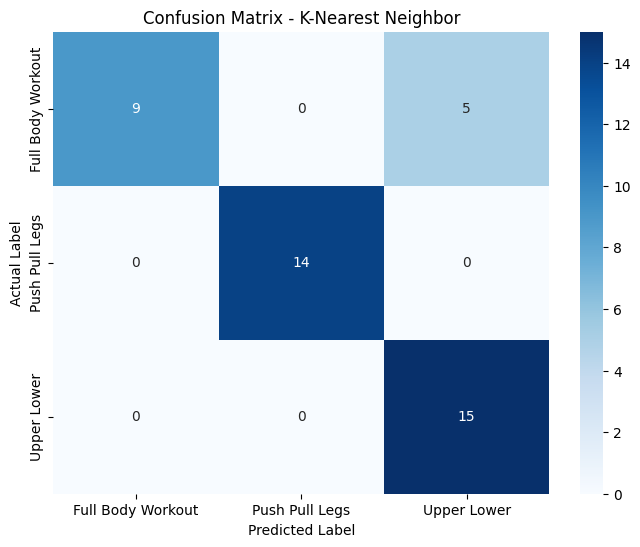




HASIL EVALUASI UNTUK MODEL: DECISION TREE

Classification Report:
                   precision    recall  f1-score   support

Full Body Workout       1.00      1.00      1.00        14
   Push Pull Legs       1.00      1.00      1.00        14
      Upper Lower       1.00      1.00      1.00        15

         accuracy                           1.00        43
        macro avg       1.00      1.00      1.00        43
     weighted avg       1.00      1.00      1.00        43



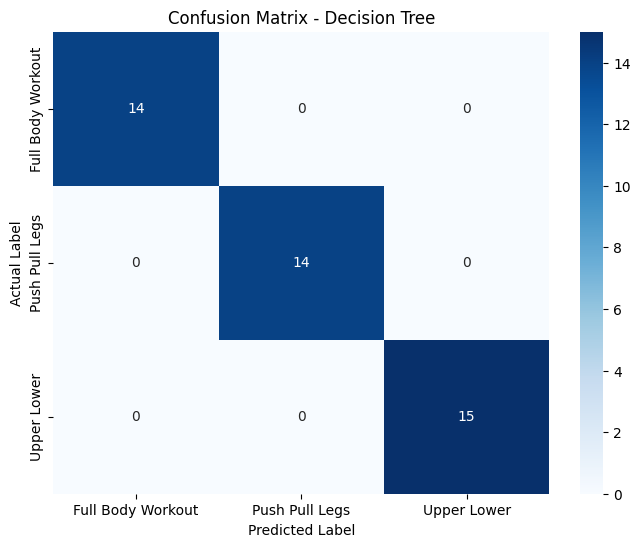




HASIL EVALUASI UNTUK MODEL: RANDOM FOREST

Classification Report:
                   precision    recall  f1-score   support

Full Body Workout       1.00      1.00      1.00        14
   Push Pull Legs       1.00      1.00      1.00        14
      Upper Lower       1.00      1.00      1.00        15

         accuracy                           1.00        43
        macro avg       1.00      1.00      1.00        43
     weighted avg       1.00      1.00      1.00        43



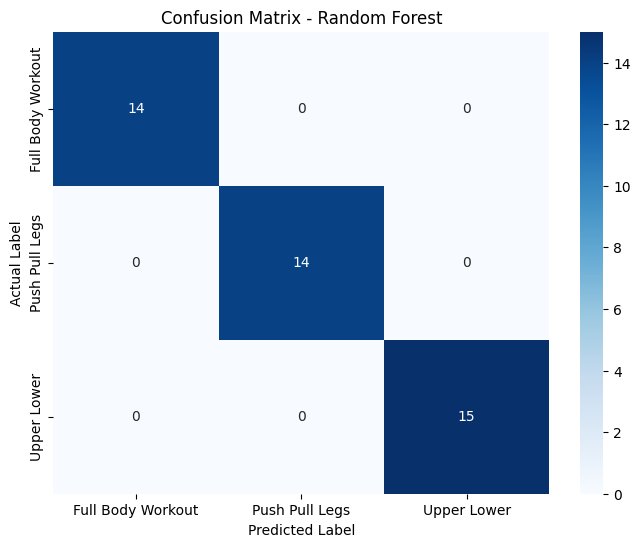

In [ ]:
# 4. Mengevaluasi Setiap Model
# Lakukan iterasi melalui dictionary 'predictions' yang sudah kita buat.
# Untuk setiap model, tenampilkan classification report dan confusion matrix.

# Label nama kelas untuk visualisasi Confusion Matrix
# (0: Full Body, 1: PPL, 2: Upper Lower)
class_names = ['Full Body Workout', 'Push Pull Legs', 'Upper Lower']
for model_name, y_pred in predictions.items():
    print(f"======================================================")
    print(f"HASIL EVALUASI UNTUK MODEL: {model_name.upper()}")
    print(f"======================================================")

    # Menampilkan Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Menghitung dan Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print("\n\n")

## Testing Model

In [ ]:
# 5. Melakukan Testing dengan Contoh Data Baru

#
# --- SILAKAN UBAH DATA DI BAWAH INI UNTUK MENCOBA SKENARIO LAIN ---
#
data_testing = {
    'profesi': 'mahasiswa',
    'frekuensi latihan': 4,
    'durasi latihan': 75,
    'tingkat kesibukan': 'sedang'
}
#
# --------------------------------------------------------------------
#

# Membuat DataFrame dari data testing
df_test = pd.DataFrame([data_testing])

print("Data Baru yang Akan Diuji:")
print(df_test)

# --- Proses Preprocessing (HARUS SAMA PERSIS DENGAN DATA TRAINING) ---

# Menggunakan Encoder dan Scaler yang sudah di-fit sebelumnya

# 1. Encoding Fitur Kategorikal
df_test['profesi'] = le_profesi.transform(df_test['profesi'])
df_test['tingkat kesibukan'] = df_test['tingkat kesibukan'].map(map_kesibukan)

# 2. Scaling Fitur Numerik
# Pisahkan kolom numerik dan non-numerik seperti saat training
numerik_cols = ['frekuensi latihan', 'durasi latihan']
kategorik_cols = ['profesi', 'tingkat kesibukan']
df_test[numerik_cols] = scaler.transform(df_test[numerik_cols])

# 3. Menggabungkan kembali fitur dalam urutan yang benar
X_final_test = df_test[kategorik_cols + numerik_cols].values

# --- Membuat Prediksi dengan Setiap Model ---

print("\n--- HASIL REKOMENDASI DARI SETIAP MODEL ---")
for model_name, model in models.items():
    pred_label_encoded = model.predict(X_final_test)
    pred_label_text = le_program.inverse_transform(pred_label_encoded)
    print(f"Model {model_name: <18}: merekomendasikan program -> {pred_label_text[0]}")

Data Baru yang Akan Diuji:
     profesi  frekuensi latihan  durasi latihan tingkat kesibukan
0  mahasiswa                  4              75            sedang

--- HASIL REKOMENDASI DARI SETIAP MODEL ---
Model K-Nearest Neighbor: merekomendasikan program -> upper & lower
Model Decision Tree     : merekomendasikan program -> upper & lower
Model Random Forest     : merekomendasikan program -> upper & lower


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
